In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv('KHIS HIV 2021.csv')
df.head()

,Orgunit ID,Data ID,Orgunit name,Data,21-Jan,21-Feb,21-Mar,21-Apr,21-May,21-Jun,...,21-Aug,21-Sep,21-Oct,21-Nov,21-Dec,Max Z score,Max modified Z score,Gap weight,Outlier weight,Total weight
0,vvOK1BxTbet,W0ChhvyVtSX,Baringo County,MOH 731 Discordant HV01-28,NaN,6.0,17.0,5.0,3.0,1.0,...,2.0,3.0,3.0,NaN,NaN,2.45,4.72,9,13,22
1,HMNARUV2CW4,W0ChhvyVtSX,Bomet County,MOH 731 Discordant HV01-28,9.0,4.0,1.0,3.0,4.0,3.0,...,8.0,4.0,6.0,53.0,3.0,3.11,22.03,0,48,48
2,KGHhQ5GLd4k,W0ChhvyVtSX,Bungoma County,MOH 731 Discordant HV01-28,6.0,15.0,25.0,17.0,50.0,24.0,...,18.0,13.0,6.0,1.0,4.0,2.58,2.59,0,37,37
3,Tvf1zgVZ0K4,W0ChhvyVtSX,Busia County,MOH 731 Discordant HV01-28,9.0,20.0,19.0,11.0,7.0,5.0,...,6.0,6.0,6.0,9.0,5.0,2.07,4.05,0,24,24
4,MqnLxQBigG0,W0ChhvyVtSX,Elgeyo Marakwet County,MOH 731 Discordant HV01-28,2.0,6.0,9.0,2.0,1.0,NaN,...,1.0,NaN,3.0,NaN,NaN,1.86,4.72,10,7,17


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Orgunit ID            171 non-null    object 
 1   Data ID               171 non-null    object 
 2   Orgunit name          171 non-null    object 
 3   Data                  171 non-null    object 
 4   21-Jan                163 non-null    float64
 5   21-Feb                166 non-null    float64
 6   21-Mar                162 non-null    float64
 7   21-Apr                164 non-null    float64
 8   21-May                166 non-null    float64
 9   21-Jun                165 non-null    float64
 10  21-Jul                163 non-null    float64
 11  21-Aug                165 non-null    float64
 12  21-Sep                164 non-null    float64
 13  21-Oct                161 non-null    float64
 14  21-Nov                161 non-null    float64
 15  21-Dec                1

In [4]:
df.isnull().sum()

Orgunit ID               0
Data ID                  0
Orgunit name             0
Data                     0
21-Jan                   8
21-Feb                   5
21-Mar                   9
21-Apr                   7
21-May                   5
21-Jun                   6
21-Jul                   8
21-Aug                   6
21-Sep                   7
21-Oct                  10
21-Nov                  10
21-Dec                  12
Max Z score              0
Max modified Z score     0
Gap weight               0
Outlier weight           0
Total weight             0
dtype: int64

In [5]:
df.describe()

,21-Jan,21-Feb,21-Mar,21-Apr,21-May,21-Jun,21-Jul,21-Aug,21-Sep,21-Oct,21-Nov,21-Dec,Max Z score,Max modified Z score,Gap weight,Outlier weight,Total weight
count,163.000000,166.000000,162.000000,164.000000,166.000000,165.000000,163.00000,165.000000,164.000000,161.000000,161.000000,159.000000,171.000000,171.000000,171.000000,171.000000,171.000000
mean,1941.809816,2220.512048,2873.358025,2172.878049,1850.512048,1647.569697,1859.04908,2012.309091,2145.414634,1913.124224,1939.683230,1580.811321,2.175263,4.599942,6.304094,1509.923977,1516.228070
std,4908.918337,5631.356068,7284.178729,5703.563960,4768.845830,4326.305589,4610.89211,5073.675972,5285.830992,4729.365018,5010.137707,3796.037136,0.389465,5.655049,30.116459,3329.956479,3328.096677
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,38.000000,36.750000,43.250000,38.000000,25.750000,31.000000,20.00000,27.000000,37.750000,55.000000,42.000000,38.000000,2.030000,2.505000,0.000000,28.000000,37.000000
50%,213.000000,197.500000,295.000000,212.500000,180.000000,155.000000,153.00000,240.000000,279.500000,243.000000,215.000000,187.000000,2.130000,3.120000,0.000000,154.000000,163.000000
75%,1204.500000,1383.000000,1594.500000,1168.000000,1024.250000,853.000000,1114.50000,1209.000000,1571.750000,1432.000000,1369.000000,1107.000000,2.345000,4.135000,0.000000,1332.500000,1332.500000
max,43095.000000,49140.000000,61309.000000,51361.000000,40743.000000,33977.000000,37732.00000,42852.000000,47738.000000,43020.000000,47230.000000,33621.000000,3.150000,44.520000,265.000000,21651.000000,21651.000000


In [6]:
df['Orgunit name'].value_counts()

Kiambu County             6
Migori County             6
Machakos County           6
Kisumu County             6
Turkana County            6
Kirinyaga County          6
Wajir County              6
Kericho County            6
Meru County               5
Vihiga County             5
Muranga County            5
Nyeri County              5
Busia County              5
Bungoma County            5
Isiolo County             4
Samburu County            4
Embu County               4
Uasin Gishu County        4
Kwale County              4
Mandera County            4
Kilifi County             4
Siaya County              4
Bomet County              4
Kitui County              4
Baringo County            3
West Pokot County         3
Tharaka Nithi County      3
Kisii County              3
Nairobi County            3
Trans Nzoia County        3
Mombasa County            3
Tana River County         3
Marsabit County           3
Lamu County               3
Kakamega County           3
Homa Bay County     

In [7]:
df['Data'].value_counts()

MOH 731   Discordant HV01-28                                     37
MOH 731  Total       HV01-50                                     27
MOH 731   Negative_Total HV01-27                                 23
MOH 731   Positive_Total   (Sum  HV01-18 to  HV01-25) HV01-26    23
MOH 731  Tested_Couples HV01-15                                  22
MOH 731  Tested_New HV01-13                                      21
MOH 731   Linked_Total HV01-35                                   18
Name: Data, dtype: int64

### Description of data column 
- *Discordant HV01-28*:  This refers to couples that got tested together yet their results did not match; ie 1 pos 1 neg
- *Total HVO1-50*: Refers to ppl who self tested prior to visiting the clinic for counselling and testing.
- *Negative_Total HV01-27*: Total no. of ppl that tested negative
- *Positive_Total   (Sum  HV01-18 to  HV01-25) HV01-26* - Total number of positive patients

**The previous two can be added to get the total number of tests for the month**

- *Tested_Couples HV01-15*: Indiviuals in a rlt that both take a test together, each is accounted for individually
- *Tested_New HV01-13*: Clients testing for the 1st time ever or those getting tested that haven't done so for the past 12 months
- *Linked_Total HV01-35*: Total number tested positive in the last 3 months


In [8]:
t20 = df['Orgunit name'].value_counts()[:22]
b20 = df['Orgunit name'].value_counts()[22:]

## Plotting the 20 counties with the MOST available data
*Counties with the most instances*

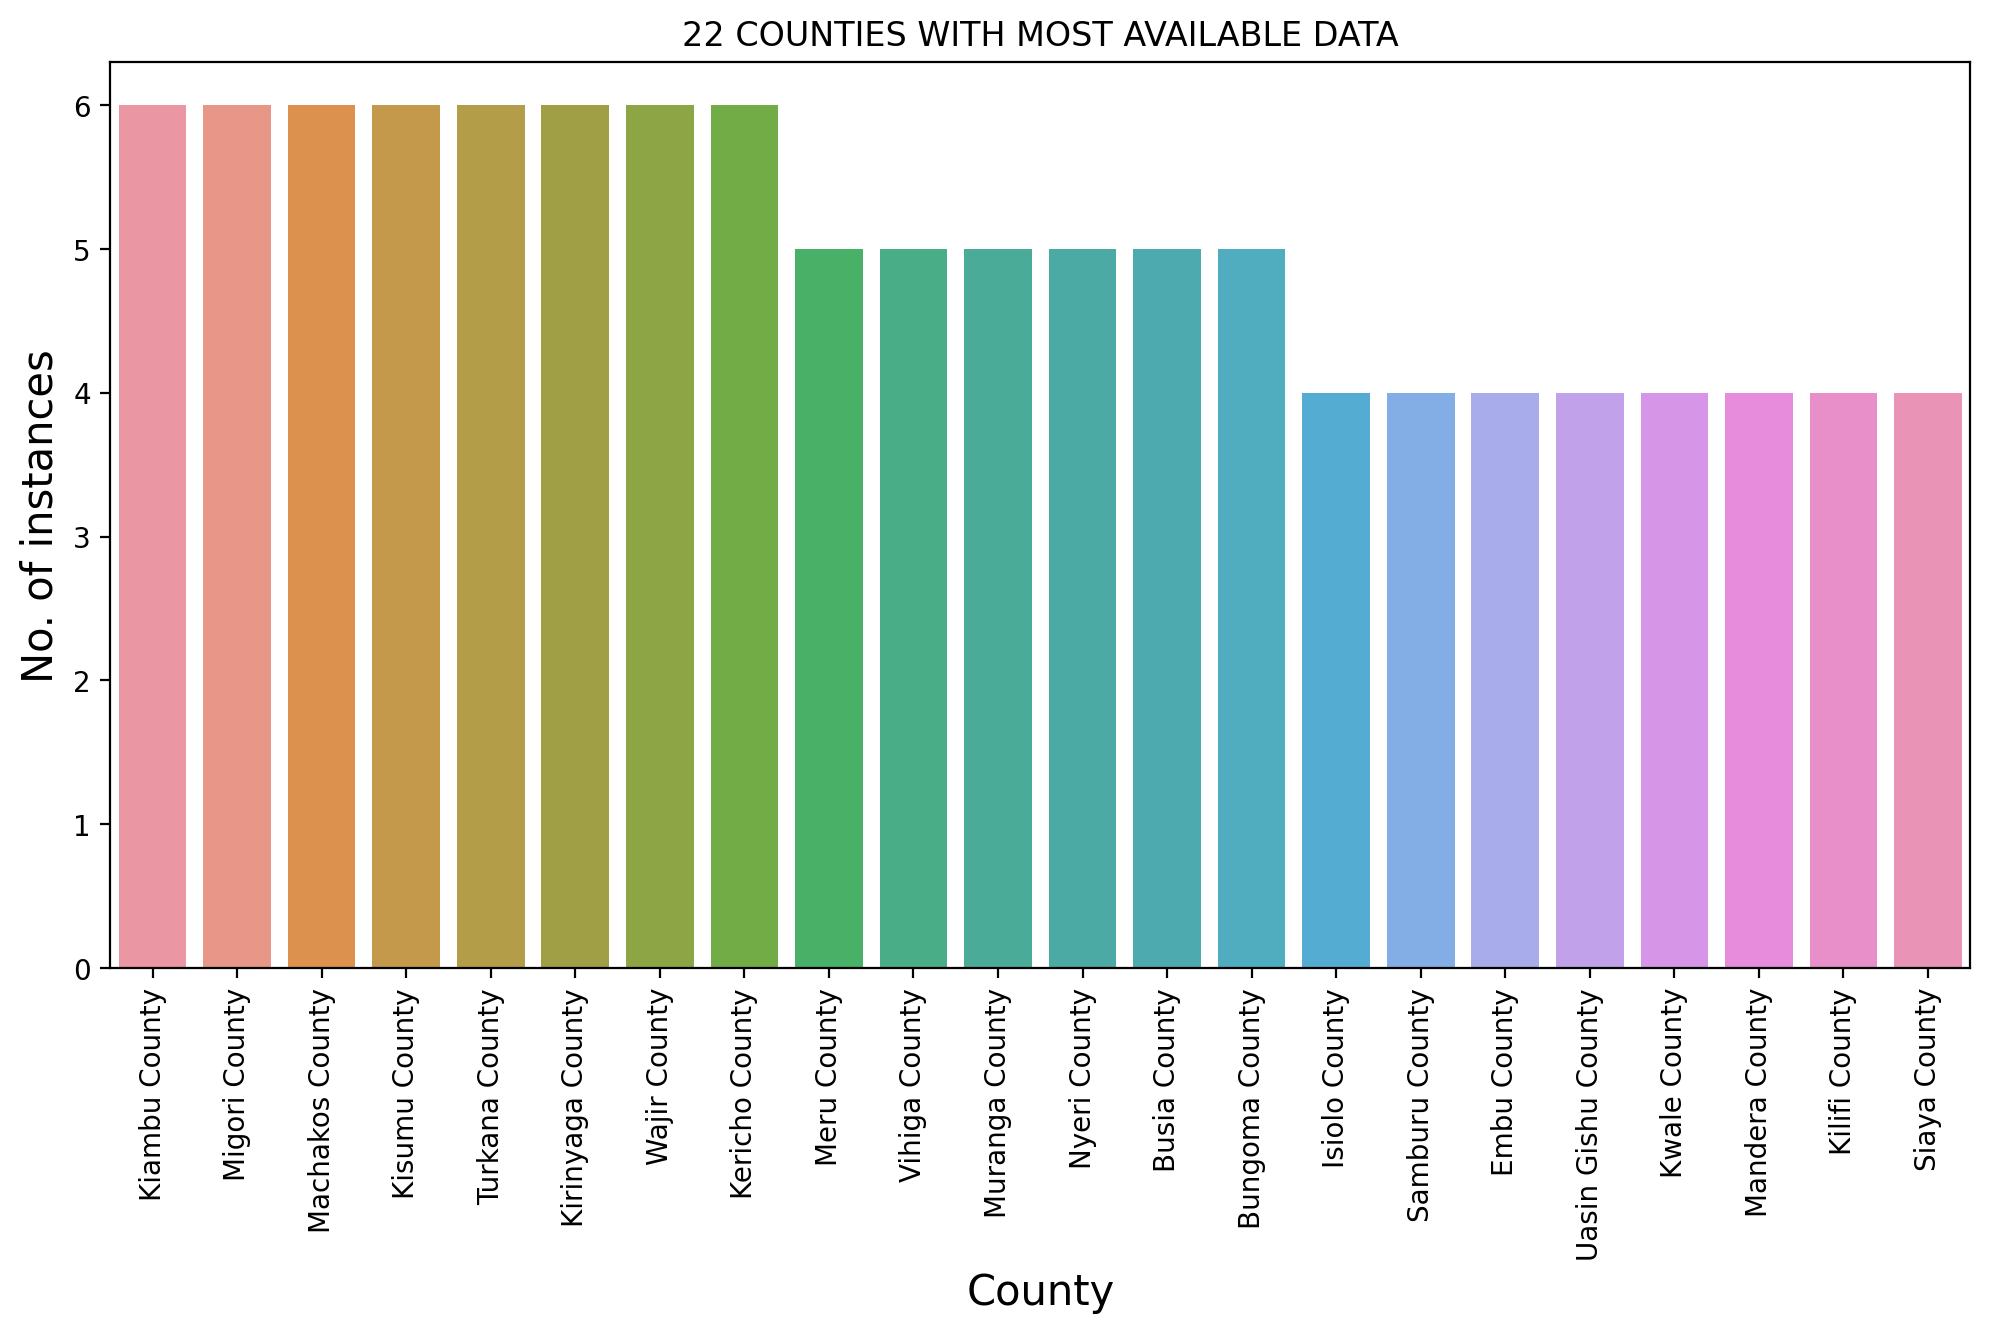

In [9]:
fig, ax = plt.subplots(1,1,sharex=True, figsize=(12,6), dpi=200)

fig = sns.barplot(x=t20.index,
                  y=t20.values,
                  ax=ax)

ax.set_xticklabels(labels=ax.get_xticklabels(),
                   rotation=90)

ax.set_title('22 COUNTIES WITH MOST AVAILABLE DATA')

ax.set_xlabel('County',
              fontsize=15)

ax.set_ylabel('No. of instances',
              fontsize=15)


plt.show()

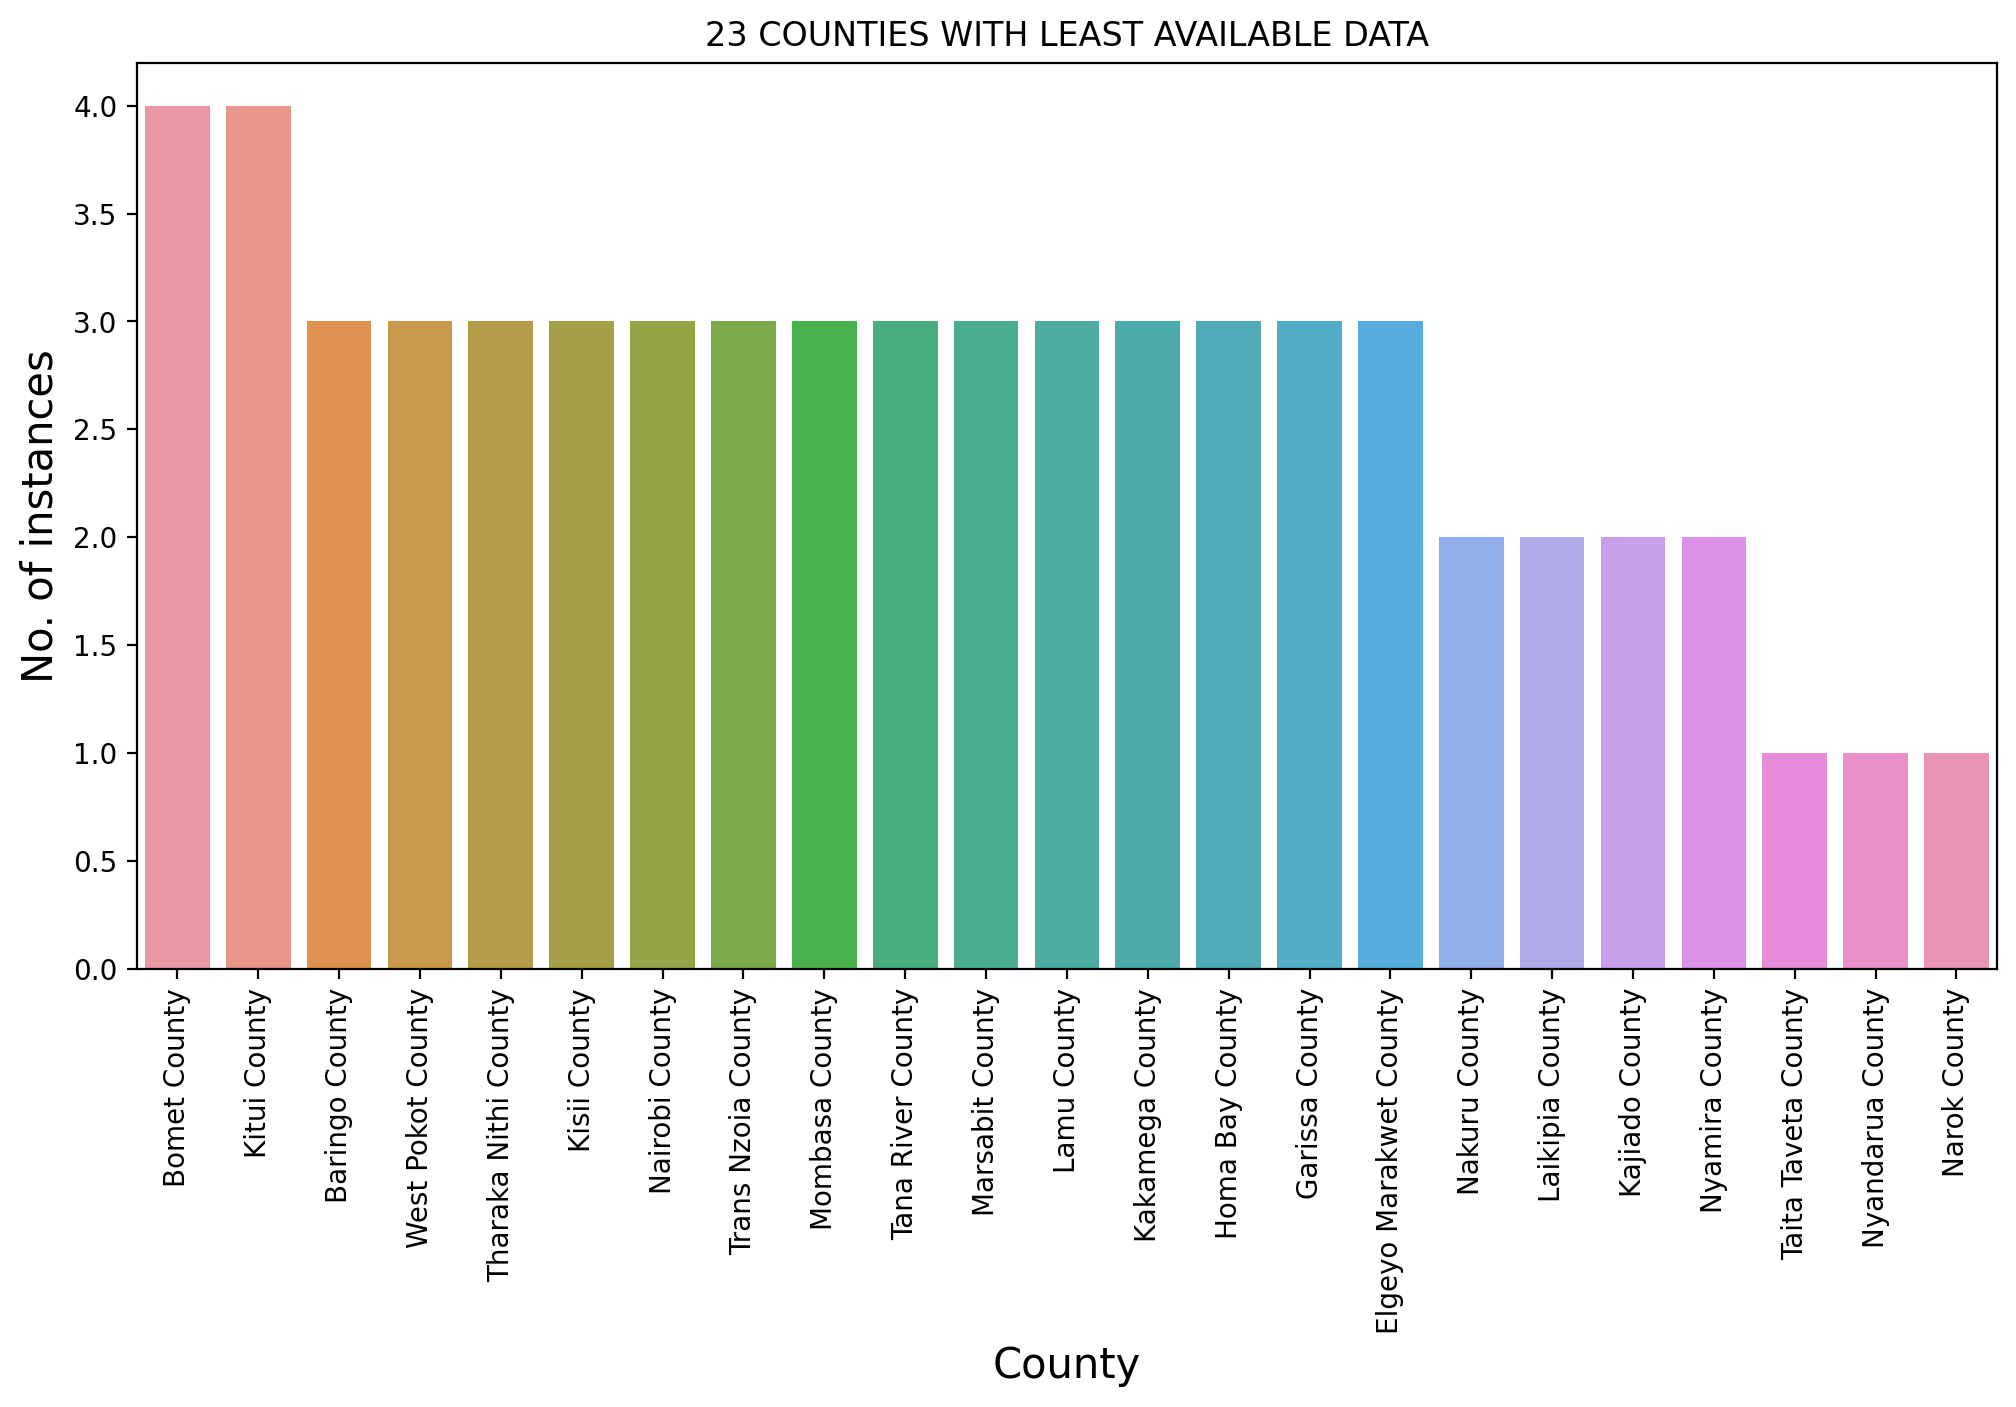

In [10]:
fig, ax = plt.subplots(1,1,sharex=True, figsize=(12,6), dpi=200)

fig = sns.barplot(x=b20.index,
                  y=b20.values,
                  ax=ax)

ax.set_xticklabels(labels=ax.get_xticklabels(),
                   rotation=90)

ax.set_title('23 COUNTIES WITH LEAST AVAILABLE DATA')

ax.set_xlabel('County',
              fontsize=15)

ax.set_ylabel('No. of instances',
              fontsize=15)


plt.show()

In [11]:
# df.groupby(['Data', 'Orgunit name']).sum().reset_index()

## Creating a new column with the total number of individuals tested in the year

In [12]:
df['Year Total'] = df.iloc[:, 4:16].sum(axis=1)
df

,Orgunit ID,Data ID,Orgunit name,Data,21-Jan,21-Feb,21-Mar,21-Apr,21-May,21-Jun,...,21-Sep,21-Oct,21-Nov,21-Dec,Max Z score,Max modified Z score,Gap weight,Outlier weight,Total weight,Year Total
0,vvOK1BxTbet,W0ChhvyVtSX,Baringo County,MOH 731 Discordant HV01-28,NaN,6.0,17.0,5.0,3.0,1.0,...,3.0,3.0,NaN,NaN,2.45,4.72,9,13,22,47.0
1,HMNARUV2CW4,W0ChhvyVtSX,Bomet County,MOH 731 Discordant HV01-28,9.0,4.0,1.0,3.0,4.0,3.0,...,4.0,6.0,53.0,3.0,3.11,22.03,0,48,48,109.0
2,KGHhQ5GLd4k,W0ChhvyVtSX,Bungoma County,MOH 731 Discordant HV01-28,6.0,15.0,25.0,17.0,50.0,24.0,...,13.0,6.0,1.0,4.0,2.58,2.59,0,37,37,195.0
3,Tvf1zgVZ0K4,W0ChhvyVtSX,Busia County,MOH 731 Discordant HV01-28,9.0,20.0,19.0,11.0,7.0,5.0,...,6.0,6.0,9.0,5.0,2.07,4.05,0,24,24,113.0
4,MqnLxQBigG0,W0ChhvyVtSX,Elgeyo Marakwet County,MOH 731 Discordant HV01-28,2.0,6.0,9.0,2.0,1.0,NaN,...,NaN,3.0,NaN,NaN,1.86,4.72,10,7,17,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,T4urHM47nlm,OYGWqG4HnBZ,Tharaka Nithi County,MOH 731 Tested_New HV01-13,1463.0,1398.0,1485.0,1159.0,1223.0,886.0,...,1215.0,1184.0,1926.0,995.0,2.35,2.65,0,692,692,15498.0
167,kphDeKClFch,OYGWqG4HnBZ,Turkana County,MOH 731 Tested_New HV01-13,5817.0,5899.0,5952.0,4815.0,4488.0,5564.0,...,9830.0,5078.0,5353.0,4225.0,2.08,6.31,0,9067,9067,71976.0
168,pZqQRRW7PHP,OYGWqG4HnBZ,Uasin Gishu County,MOH 731 Tested_New HV01-13,2335.0,2715.0,3100.0,2907.0,2478.0,2085.0,...,2786.0,2469.0,2027.0,1300.0,2.39,3.27,0,1277,1277,29645.0
169,sANMZ3lpqGs,OYGWqG4HnBZ,Vihiga County,MOH 731 Tested_New HV01-13,1762.0,1515.0,2033.0,2292.0,1829.0,1270.0,...,1518.0,1242.0,1601.0,1471.0,2.03,2.58,0,673,673,20101.0


## Total number of individuals tested yearly per county 

In [13]:
tot_county = df.groupby('Orgunit name').sum()

In [14]:
tot_county = tot_county.sort_values('Year Total',ascending=False)

In [15]:
tot_county1 = tot_county[tot_county['Year Total'] >= 100000]
tot_county1

,21-Jan,21-Feb,21-Mar,21-Apr,21-May,21-Jun,21-Jul,21-Aug,21-Sep,21-Oct,21-Nov,21-Dec,Max Z score,Max modified Z score,Gap weight,Outlier weight,Total weight,Year Total
Orgunit name,,,,,,,,,,,,,,,,,,
Nairobi County,63334.0,72360.0,91099.0,74116.0,57862.0,49675.0,55809.0,62894.0,68544.0,62307.0,67545.0,48891.0,6.68,8.57,0,28977,28977,774436.0
Migori County,24296.0,27978.0,38452.0,30989.0,32561.0,30837.0,30680.0,33006.0,27953.0,30397.0,31316.0,22720.0,12.55,23.13,0,12320,12320,361185.0
Kiambu County,29061.0,31457.0,35568.0,28154.0,23793.0,19213.0,24840.0,25668.0,25889.0,23008.0,23730.0,19193.0,14.09,25.54,0,11252,11252,309574.0
Kisumu County,20838.0,22706.0,31050.0,27990.0,24742.0,23945.0,20909.0,20585.0,20724.0,20189.0,21880.0,19367.0,12.46,27.91,0,26128,26128,274925.0
Turkana County,19581.0,18643.0,20534.0,16561.0,15768.0,18532.0,17666.0,32243.0,35074.0,18388.0,20619.0,16509.0,13.45,32.52,0,34123,34123,250118.0
Siaya County,18532.0,24851.0,33711.0,22190.0,14830.0,20054.0,12053.0,10037.0,15672.0,17940.0,14916.0,15273.0,9.17,18.60,0,26809,26809,220059.0
Homa Bay County,17712.0,23453.0,30095.0,19667.0,18624.0,9499.0,18382.0,20264.0,12872.0,14844.0,18462.0,11622.0,7.58,18.80,0,13614,13614,215496.0
Mombasa County,12580.0,14341.0,21639.0,15035.0,13621.0,18953.0,15798.0,15089.0,16556.0,14591.0,15459.0,12065.0,7.22,10.81,0,6816,6816,185727.0
Machakos County,15867.0,16437.0,20215.0,14281.0,11403.0,8082.0,12826.0,13233.0,12368.0,12651.0,13399.0,8964.0,13.50,21.06,0,8226,8226,159726.0


In [16]:
tot_county2 = tot_county[tot_county['Year Total'] < 100000]
tot_county2

,21-Jan,21-Feb,21-Mar,21-Apr,21-May,21-Jun,21-Jul,21-Aug,21-Sep,21-Oct,21-Nov,21-Dec,Max Z score,Max modified Z score,Gap weight,Outlier weight,Total weight,Year Total
Orgunit name,,,,,,,,,,,,,,,,,,
Kilifi County,4254.0,5554.0,7379.0,5589.0,5394.0,5819.0,6068.0,5523.0,6856.0,5972.0,4915.0,4635.0,8.76,16.03,0,2036,2036,67958.0
Vihiga County,5689.0,5306.0,7578.0,7373.0,6112.0,4067.0,5578.0,5514.0,5702.0,4290.0,4652.0,4540.0,10.82,13.38,0,2553,2553,66401.0
Kericho County,3351.0,6886.0,8329.0,5946.0,4556.0,2344.0,4601.0,4735.0,8079.0,5142.0,5548.0,4830.0,13.67,54.48,0,7779,7779,64347.0
Bomet County,5766.0,6507.0,9376.0,4166.0,2225.0,778.0,3713.0,3821.0,4708.0,5272.0,5175.0,5916.0,10.39,62.32,0,6185,6185,57423.0
Tharaka Nithi County,4628.0,4781.0,5063.0,3887.0,4424.0,2687.0,3709.0,4617.0,4839.0,3464.0,5335.0,3946.0,5.95,6.98,6,1991,1997,51380.0
Trans Nzoia County,3260.0,3658.0,5173.0,4687.0,3407.0,4078.0,3581.0,3186.0,3752.0,2250.0,1473.0,1269.0,6.26,9.95,0,2350,2350,39774.0
Nyeri County,3074.0,2489.0,4392.0,2278.0,1345.0,2163.0,2458.0,2093.0,3463.0,3516.0,2872.0,2468.0,12.04,36.42,159,5413,5572,32611.0
Busia County,2092.0,2266.0,3984.0,3212.0,2470.0,1008.0,2082.0,3279.0,3701.0,2552.0,2133.0,1517.0,10.62,14.85,0,2539,2539,30296.0
Garissa County,2699.0,3229.0,2649.0,2315.0,4478.0,2425.0,2460.0,1869.0,2575.0,1680.0,1504.0,868.0,5.52,8.42,6,1655,1661,28751.0


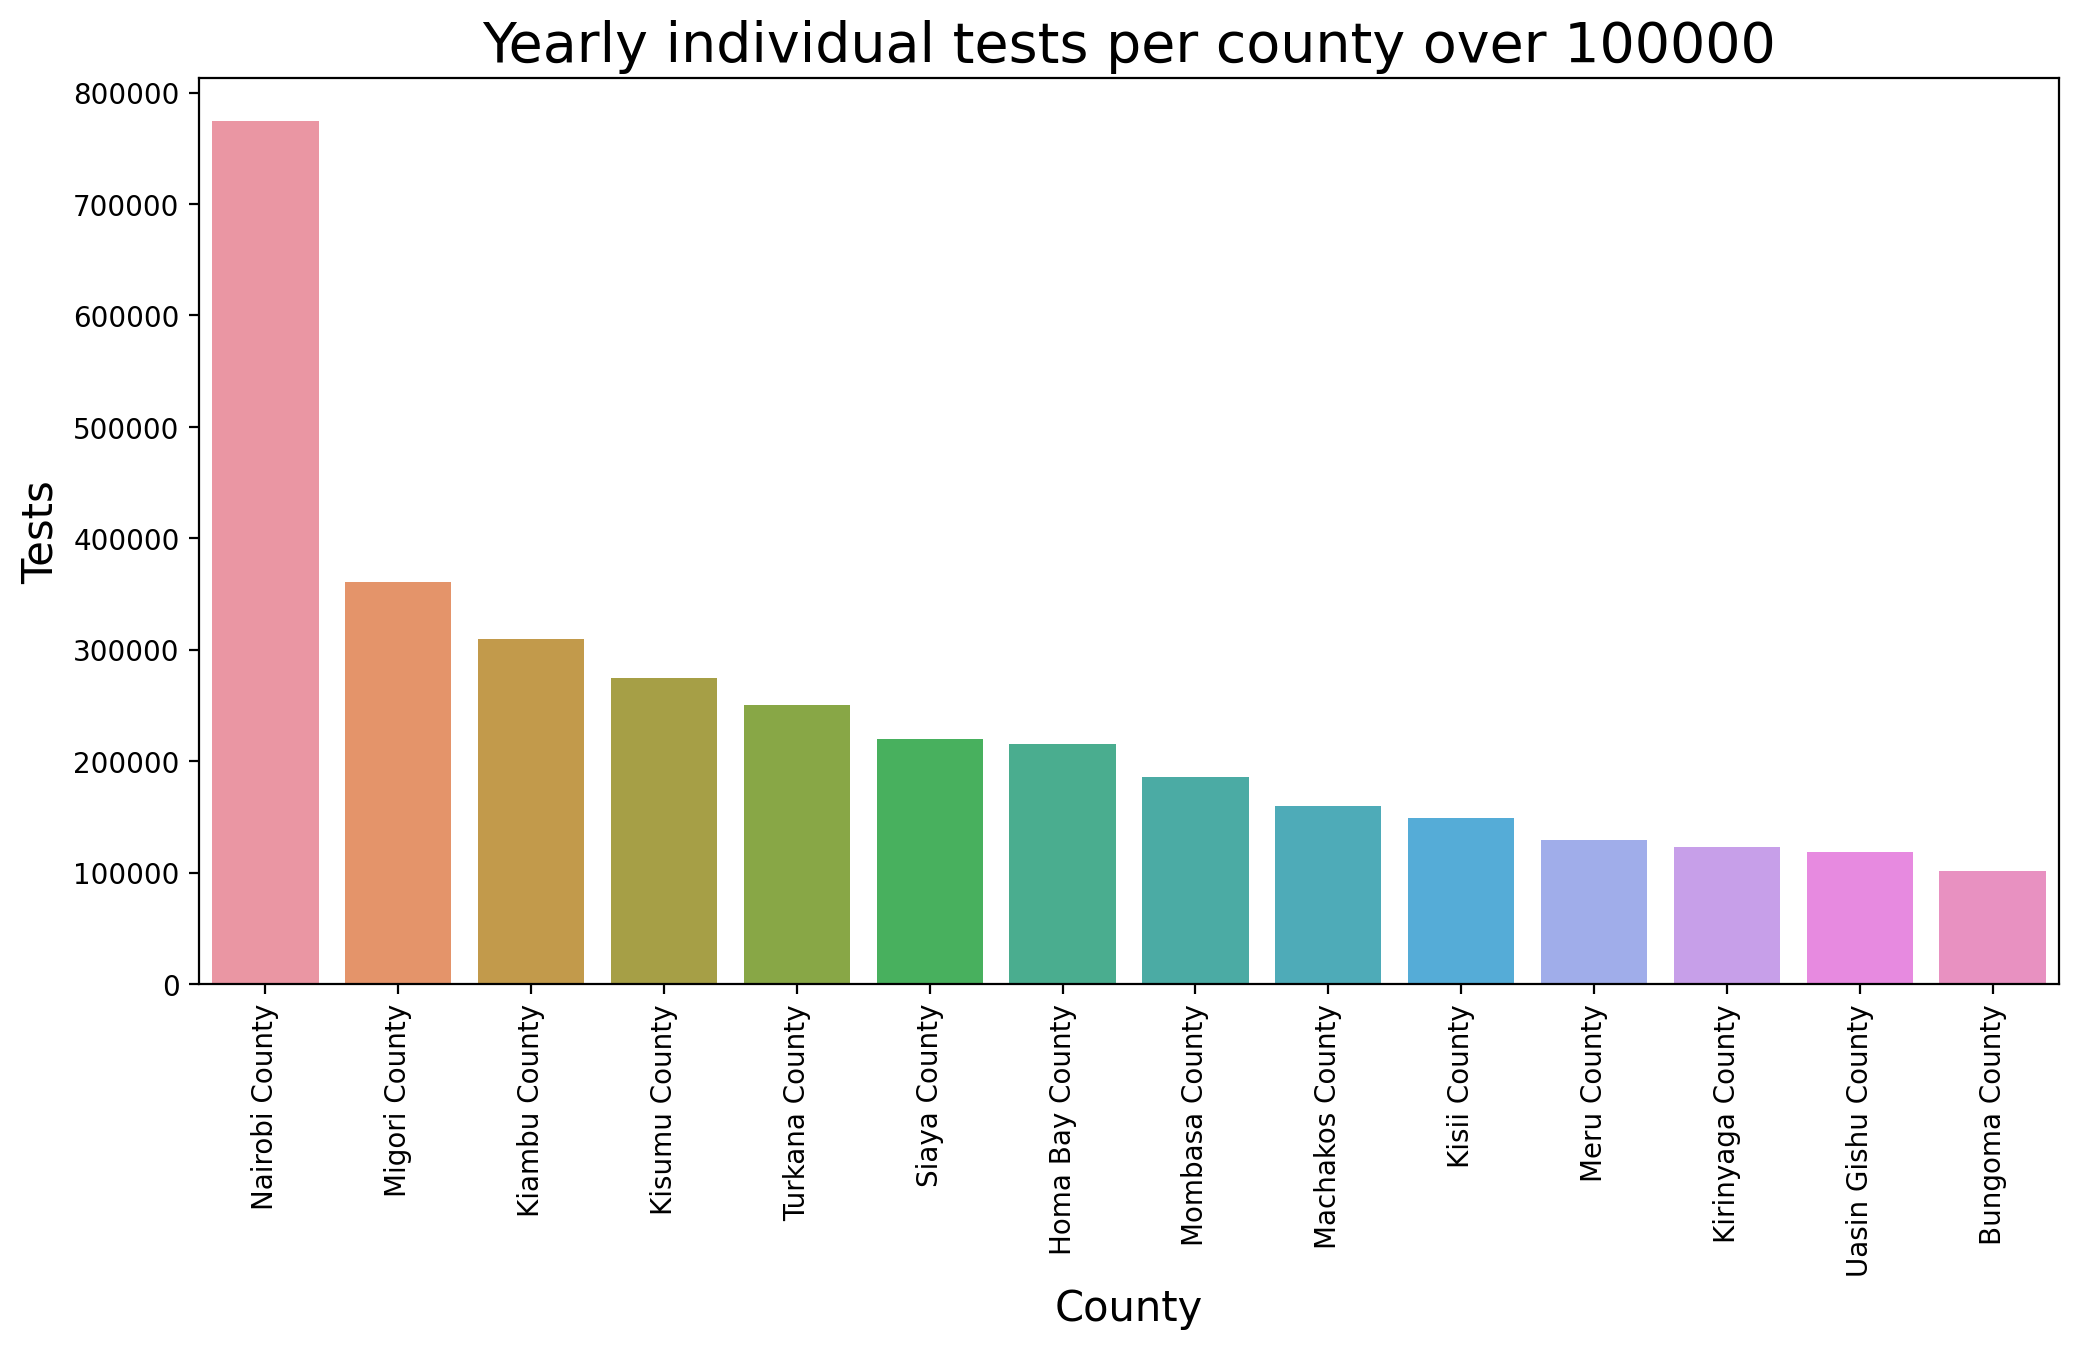

In [17]:
fig, ax = plt.subplots(1,1, figsize=(12,6), dpi=200)

fig = sns.barplot(x=tot_county1.index,
                  y=tot_county1['Year Total'],
                  ax=ax)

ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=90)

ax.set_title('Yearly individual tests per county over 100000',
              fontsize=20)

ax.set_xlabel('County',
             fontsize=15)

ax.set_ylabel('Tests',
              fontsize=15)

plt.show()

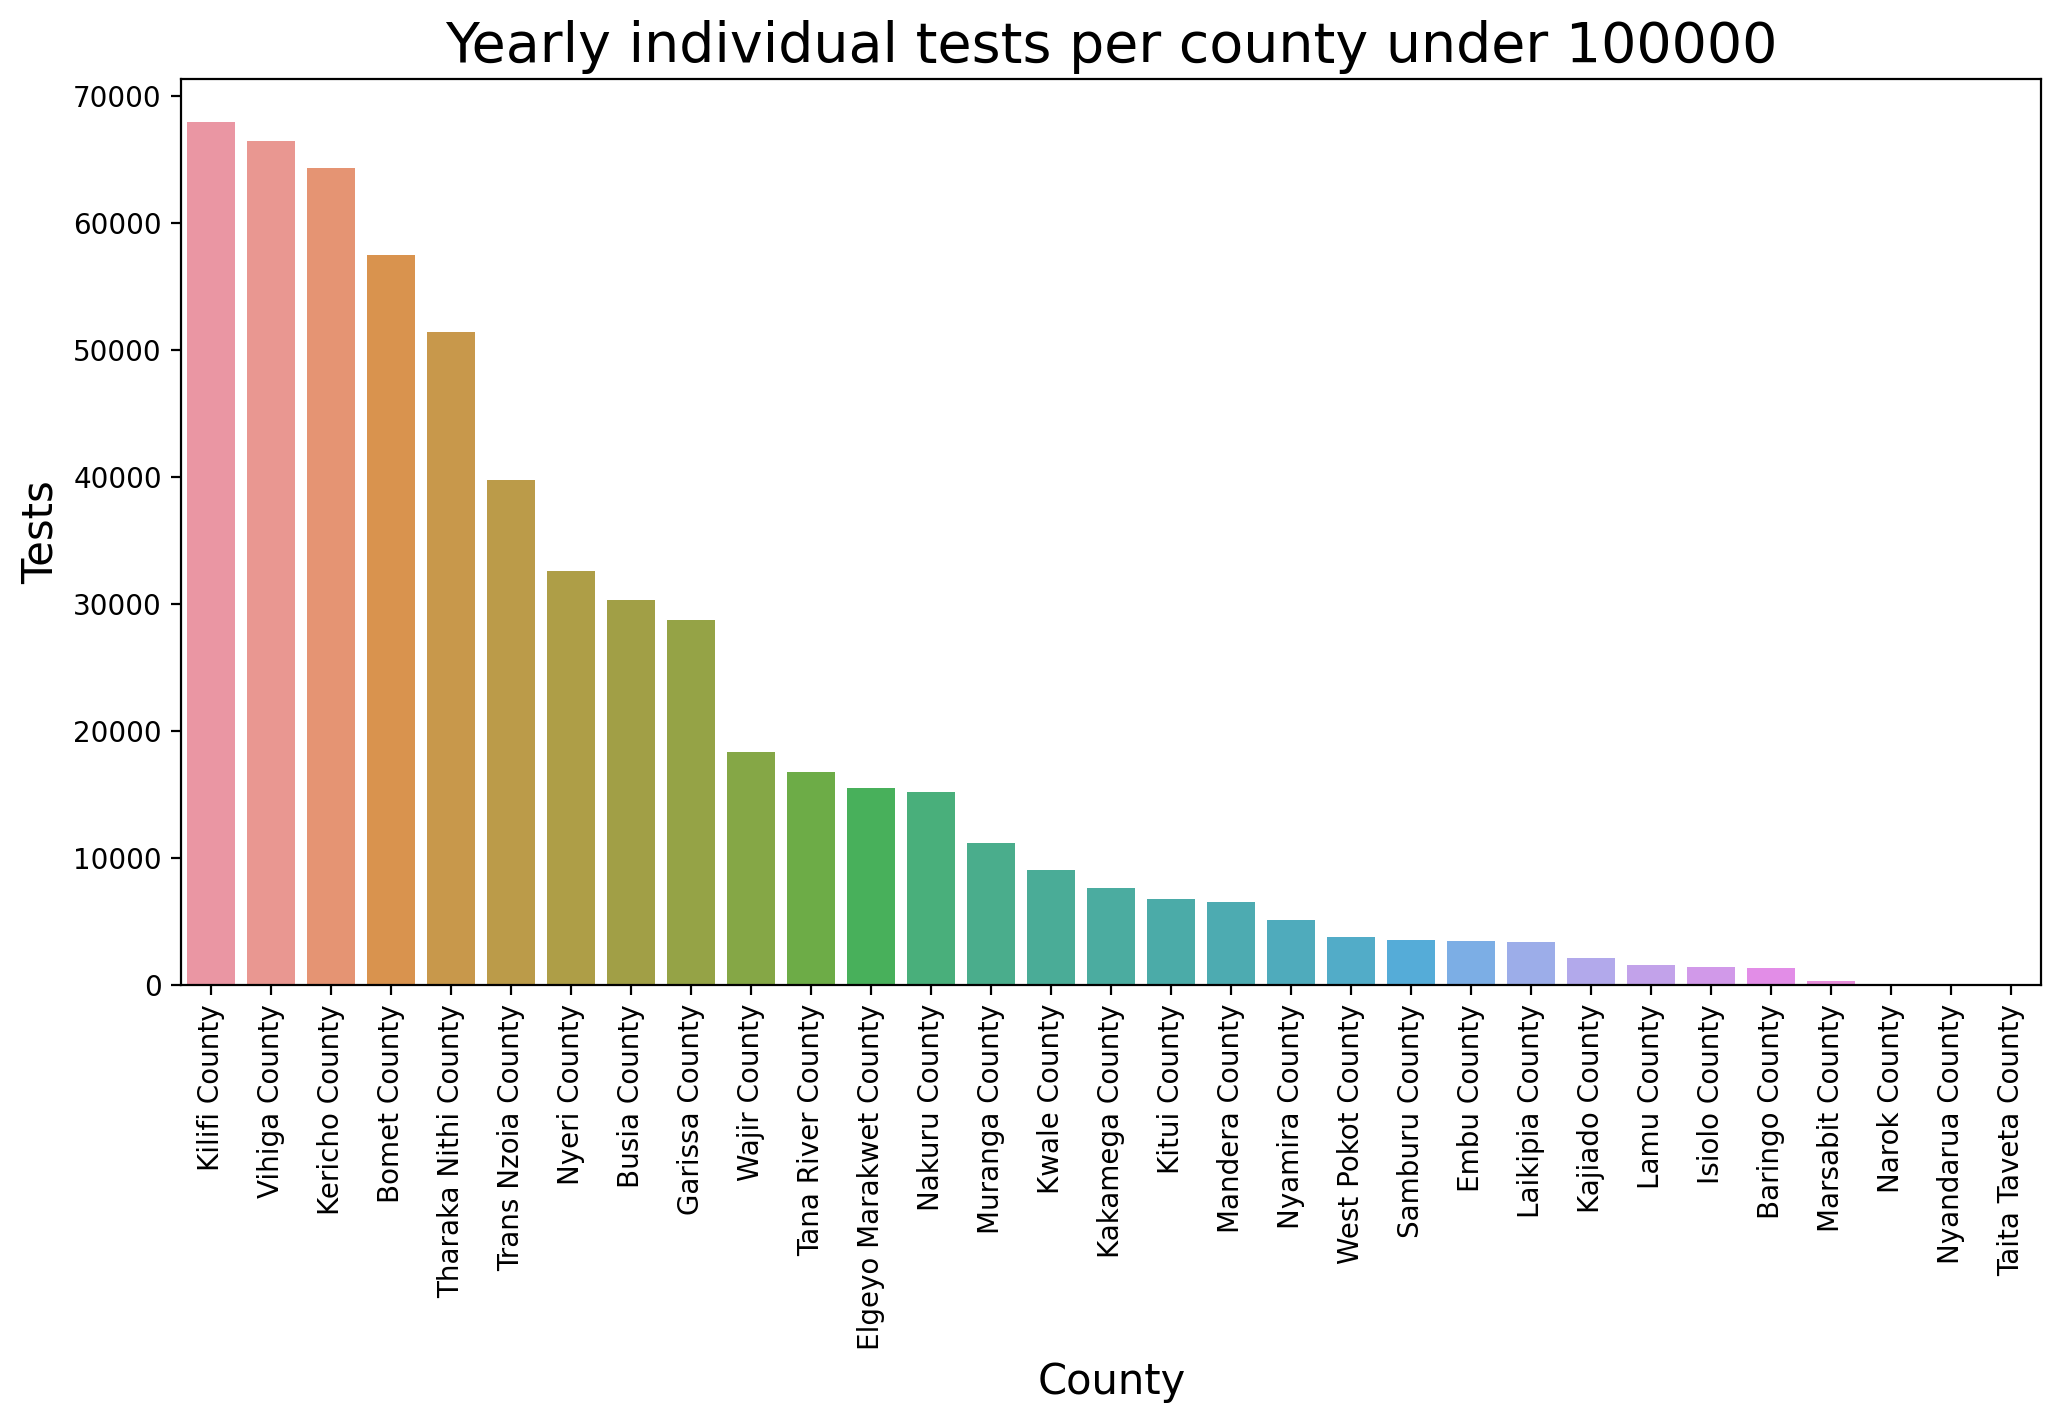

In [18]:
fig, ax = plt.subplots(1,1, figsize=(12,6), dpi=200)

fig = sns.barplot(x=tot_county2.index,
                  y=tot_county2['Year Total'],
                  ax=ax)

ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=90)

ax.set_title('Yearly individual tests per county under 100000',
              fontsize=20)

ax.set_xlabel('County',
             fontsize=15)

ax.set_ylabel('Tests',
              fontsize=15)

plt.show()

In [19]:
OrgId = list(df['Orgunit ID'])
DataID = list(df['Data ID'])
County = list(df['Orgunit name'])


In [20]:
# df.columns

In [21]:
# df

In [22]:
df = df.sort_values(by=['Orgunit name', 'Data'])
# df

In [23]:
df.groupby('Orgunit name')

In [24]:
c1 = df.iloc[0:37] #Discordant 
c2 = df.iloc[37:55] #Linked Total 
c3 = df.iloc[55:78]
c4 = df.iloc[78:101]
c5 = df.iloc[101:123]
c6 = df.iloc[123:150]
c7 = df.iloc[150:]


In [25]:
print(len(c1), len(c2), len(c3), len(c4), len(c5), len(c6), len(c7))

37 18 23 23 22 27 21


In [26]:
c2

,Orgunit ID,Data ID,Orgunit name,Data,21-Jan,21-Feb,21-Mar,21-Apr,21-May,21-Jun,...,21-Sep,21-Oct,21-Nov,21-Dec,Max Z score,Max modified Z score,Gap weight,Outlier weight,Total weight,Year Total
105,BjC1xL40gHo,kmuBTU9NAjw,Kakamega County,MOH 731 Tested_Couples HV01-15,240.0,304.0,457.0,260.0,196.0,370.0,...,252.0,183.0,114.0,170.0,2.17,2.93,0,236,236,2884.0
129,BjC1xL40gHo,q50r2FWg6de,Kakamega County,MOH 731 Total HV01-50,271.0,185.0,213.0,334.0,164.0,111.0,...,1047.0,659.0,602.0,306.0,2.41,3.54,0,739,739,4431.0
11,ihZsJ8alvtb,W0ChhvyVtSX,Kericho County,MOH 731 Discordant HV01-28,2.0,5.0,9.0,12.0,4.0,1.0,...,6.0,5.0,3.0,5.0,2.16,3.15,0,7,7,64.0
40,ihZsJ8alvtb,NYkr7LlxmUg,Kericho County,MOH 731 Linked_Total HV01-35,107.0,143.0,98.0,121.0,156.0,104.0,...,112.0,114.0,143.0,122.0,2.00,3.78,0,39,39,1442.0
60,ihZsJ8alvtb,qw7eJpLE3vK,Kericho County,MOH 731 Negative_Total HV01-27,1855.0,3988.0,4930.0,3545.0,2610.0,1282.0,...,2908.0,2582.0,2895.0,2842.0,2.16,7.22,0,1992,1992,34824.0
106,ihZsJ8alvtb,kmuBTU9NAjw,Kericho County,MOH 731 Tested_Couples HV01-15,153.0,198.0,295.0,259.0,175.0,66.0,...,154.0,136.0,136.0,181.0,2.08,4.89,0,254,254,2055.0
153,ihZsJ8alvtb,OYGWqG4HnBZ,Kericho County,MOH 731 Tested_New HV01-13,1141.0,2422.0,2885.0,1879.0,1493.0,814.0,...,1719.0,1462.0,1812.0,1473.0,2.21,3.79,0,1316,1316,20147.0
130,ihZsJ8alvtb,q50r2FWg6de,Kericho County,MOH 731 Total HV01-50,93.0,130.0,112.0,130.0,118.0,77.0,...,3180.0,843.0,559.0,207.0,3.06,31.65,0,4171,4171,5815.0
12,qKzosKQPl6G,W0ChhvyVtSX,Kiambu County,MOH 731 Discordant HV01-28,20.0,19.0,23.0,21.0,25.0,37.0,...,28.0,75.0,23.0,12.0,2.94,8.77,0,52,52,328.0
41,qKzosKQPl6G,NYkr7LlxmUg,Kiambu County,MOH 731 Linked_Total HV01-35,374.0,371.0,313.0,376.0,430.0,465.0,...,345.0,354.0,364.0,351.0,2.14,3.12,0,95,95,4538.0


In [27]:
grouper = df.groupby('Data')
df_trial = pd.concat([pd.Series(v['21-Jan'].tolist(), name=k) for k, v in grouper], axis=1)
df_trial['Month'] = 1
# df_trial['Counties'] = c1['Orgunit name']
df_trial

,MOH 731 Discordant HV01-28,MOH 731 Linked_Total HV01-35,MOH 731 Negative_Total HV01-27,MOH 731 Positive_Total (Sum HV01-18 to HV01-25) HV01-26,MOH 731 Tested_Couples HV01-15,MOH 731 Tested_New HV01-13,MOH 731 Total HV01-50,Month
0,NaN,41.0,5571.0,46.0,151.0,2739.0,66.0,1
1,9.0,257.0,4877.0,120.0,126.0,1544.0,213.0,1
2,6.0,115.0,1193.0,202.0,854.0,1087.0,186.0,1
3,9.0,107.0,1610.0,51.0,41.0,1141.0,20.0,1
4,2.0,374.0,16825.0,24.0,240.0,7726.0,51.0,1
5,1.0,267.0,1855.0,375.0,153.0,3281.0,95.0,1
6,2.0,65.0,19350.0,229.0,1216.0,2618.0,271.0,1
7,33.0,740.0,4824.0,74.0,477.0,3058.0,93.0,1
8,NaN,168.0,7638.0,182.0,203.0,2948.0,461.0,1
9,6.0,48.0,16060.0,7.0,629.0,4231.0,428.0,1


In [28]:
df2 = df[df['Orgunit name'] == 'Baringo County']
df2.groupby(['Orgunit name', 'Data']).count().reset_index()

,Orgunit name,Data,Orgunit ID,Data ID,21-Jan,21-Feb,21-Mar,21-Apr,21-May,21-Jun,...,21-Sep,21-Oct,21-Nov,21-Dec,Max Z score,Max modified Z score,Gap weight,Outlier weight,Total weight,Year Total
0,Baringo County,MOH 731 Discordant HV01-28,1,1,0,1,1,1,1,1,...,1,1,0,0,1,1,1,1,1,1
1,Baringo County,MOH 731 Linked_Total HV01-35,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,Baringo County,MOH 731 Positive_Total (Sum HV01-18 to H...,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [29]:
col = df.columns[4:16]
col

Index(['21-Jan', '21-Feb', '21-Mar', '21-Apr', '21-May', '21-Jun', '21-Jul',
       '21-Aug', '21-Sep', '21-Oct', '21-Nov', '21-Dec'],
      dtype='object')

In [30]:
df.head()

,Orgunit ID,Data ID,Orgunit name,Data,21-Jan,21-Feb,21-Mar,21-Apr,21-May,21-Jun,...,21-Sep,21-Oct,21-Nov,21-Dec,Max Z score,Max modified Z score,Gap weight,Outlier weight,Total weight,Year Total
0,vvOK1BxTbet,W0ChhvyVtSX,Baringo County,MOH 731 Discordant HV01-28,NaN,6.0,17.0,5.0,3.0,1.0,...,3.0,3.0,NaN,NaN,2.45,4.72,9,13,22,47.0
37,vvOK1BxTbet,NYkr7LlxmUg,Baringo County,MOH 731 Linked_Total HV01-35,41.0,49.0,34.0,47.0,51.0,59.0,...,37.0,71.0,48.0,50.0,2.25,3.17,0,26,26,567.0
78,vvOK1BxTbet,dlldM4hP2Wk,Baringo County,MOH 731 Positive_Total (Sum HV01-18 to H...,46.0,58.0,81.0,50.0,38.0,22.0,...,72.0,58.0,57.0,58.0,2.14,2.43,0,37,37,672.0
1,HMNARUV2CW4,W0ChhvyVtSX,Bomet County,MOH 731 Discordant HV01-28,9.0,4.0,1.0,3.0,4.0,3.0,...,4.0,6.0,53.0,3.0,3.11,22.03,0,48,48,109.0
55,HMNARUV2CW4,qw7eJpLE3vK,Bomet County,MOH 731 Negative_Total HV01-27,5571.0,6247.0,7484.0,3716.0,2020.0,650.0,...,4511.0,5069.0,5017.0,5817.0,2.02,2.56,0,4131,4131,53236.0


In [31]:
df[df['Orgunit name'] == 'Baringo County']

,Orgunit ID,Data ID,Orgunit name,Data,21-Jan,21-Feb,21-Mar,21-Apr,21-May,21-Jun,...,21-Sep,21-Oct,21-Nov,21-Dec,Max Z score,Max modified Z score,Gap weight,Outlier weight,Total weight,Year Total
0,vvOK1BxTbet,W0ChhvyVtSX,Baringo County,MOH 731 Discordant HV01-28,NaN,6.0,17.0,5.0,3.0,1.0,...,3.0,3.0,NaN,NaN,2.45,4.72,9,13,22,47.0
37,vvOK1BxTbet,NYkr7LlxmUg,Baringo County,MOH 731 Linked_Total HV01-35,41.0,49.0,34.0,47.0,51.0,59.0,...,37.0,71.0,48.0,50.0,2.25,3.17,0,26,26,567.0
78,vvOK1BxTbet,dlldM4hP2Wk,Baringo County,MOH 731 Positive_Total (Sum HV01-18 to H...,46.0,58.0,81.0,50.0,38.0,22.0,...,72.0,58.0,57.0,58.0,2.14,2.43,0,37,37,672.0


In [32]:
col

Index(['21-Jan', '21-Feb', '21-Mar', '21-Apr', '21-May', '21-Jun', '21-Jul',
       '21-Aug', '21-Sep', '21-Oct', '21-Nov', '21-Dec'],
      dtype='object')

In [33]:
df1 = df.pivot(index = 'Orgunit name',
         columns = 'Data',
         values = '21-Jan')
df1.reset_index()

df1['Month'] = 1
df1

Data,MOH 731 Discordant HV01-28,MOH 731 Linked_Total HV01-35,MOH 731 Negative_Total HV01-27,MOH 731 Positive_Total (Sum HV01-18 to HV01-25) HV01-26,MOH 731 Tested_Couples HV01-15,MOH 731 Tested_New HV01-13,MOH 731 Total HV01-50,Month
Orgunit name,,,,,,,,
Baringo County,NaN,41.0,NaN,46.0,NaN,NaN,NaN,1
Bomet County,9.0,NaN,5571.0,120.0,NaN,NaN,66.0,1
Bungoma County,6.0,257.0,4877.0,NaN,NaN,2739.0,213.0,1
Busia County,9.0,NaN,NaN,202.0,151.0,1544.0,186.0,1
Elgeyo Marakwet County,2.0,NaN,1193.0,NaN,NaN,NaN,20.0,1
Embu County,1.0,NaN,NaN,51.0,126.0,NaN,51.0,1
Garissa County,2.0,NaN,1610.0,NaN,NaN,1087.0,NaN,1
Homa Bay County,33.0,NaN,16825.0,NaN,854.0,NaN,NaN,1
Isiolo County,NaN,NaN,NaN,24.0,41.0,NaN,95.0,1


In [34]:
df2 = df.pivot(index = 'Orgunit name',
         columns = 'Data',
         values = '21-Feb')
df2.reset_index()

df2['Month'] = 2

In [35]:
df2

Data,MOH 731 Discordant HV01-28,MOH 731 Linked_Total HV01-35,MOH 731 Negative_Total HV01-27,MOH 731 Positive_Total (Sum HV01-18 to HV01-25) HV01-26,MOH 731 Tested_Couples HV01-15,MOH 731 Tested_New HV01-13,MOH 731 Total HV01-50,Month
Orgunit name,,,,,,,,
Baringo County,6.0,49.0,NaN,58.0,NaN,NaN,NaN,2
Bomet County,4.0,NaN,6247.0,134.0,NaN,NaN,122.0,2
Bungoma County,15.0,270.0,5790.0,NaN,NaN,2948.0,179.0,2
Busia County,20.0,NaN,NaN,197.0,173.0,1620.0,256.0,2
Elgeyo Marakwet County,6.0,NaN,1615.0,NaN,NaN,NaN,63.0,2
Embu County,2.0,NaN,NaN,72.0,169.0,NaN,84.0,2
Garissa County,2.0,NaN,2005.0,NaN,NaN,1222.0,NaN,2
Homa Bay County,45.0,NaN,22485.0,NaN,923.0,NaN,NaN,2
Isiolo County,NaN,NaN,NaN,30.0,49.0,NaN,47.0,2


In [36]:
pd.concat([df1, df2])

Data,MOH 731 Discordant HV01-28,MOH 731 Linked_Total HV01-35,MOH 731 Negative_Total HV01-27,MOH 731 Positive_Total (Sum HV01-18 to HV01-25) HV01-26,MOH 731 Tested_Couples HV01-15,MOH 731 Tested_New HV01-13,MOH 731 Total HV01-50,Month
Orgunit name,,,,,,,,
Baringo County,NaN,41.0,NaN,46.0,NaN,NaN,NaN,1
Bomet County,9.0,NaN,5571.0,120.0,NaN,NaN,66.0,1
Bungoma County,6.0,257.0,4877.0,NaN,NaN,2739.0,213.0,1
Busia County,9.0,NaN,NaN,202.0,151.0,1544.0,186.0,1
Elgeyo Marakwet County,2.0,NaN,1193.0,NaN,NaN,NaN,20.0,1
...,...,...,...,...,...,...,...,...
Turkana County,2.0,132.0,12042.0,148.0,NaN,5899.0,420.0,2
Uasin Gishu County,30.0,NaN,8445.0,318.0,NaN,2715.0,NaN,2
Vihiga County,10.0,NaN,3514.0,130.0,137.0,1515.0,NaN,2


In [37]:
df3 = df.pivot(index = 'Orgunit name',
         columns = 'Data',
         values = '21-Mar')
df3.reset_index()

df3['Month'] = 3

df4 = df.pivot(index = 'Orgunit name',
         columns = 'Data',
         values = '21-Apr')
df4.reset_index()

df4['Month'] = 4

df5 = df.pivot(index = 'Orgunit name',
         columns = 'Data',
         values = '21-May')
df5.reset_index()

df5['Month'] = 5

df6 = df.pivot(index = 'Orgunit name',
         columns = 'Data',
         values = '21-Jun')
df6.reset_index()

df6['Month'] = 6

df7 = df.pivot(index = 'Orgunit name',
         columns = 'Data',
         values = '21-Jul')
df7.reset_index()

df7['Month'] = 7

df8 = df.pivot(index = 'Orgunit name',
         columns = 'Data',
         values = '21-Aug')
df8.reset_index()

df8['Month'] = 8

df9 = df.pivot(index = 'Orgunit name',
         columns = 'Data',
         values = '21-Sep')
df9.reset_index()

df9['Month'] = 9

df10 = df.pivot(index = 'Orgunit name',
         columns = 'Data',
         values = '21-Oct')
df10.reset_index()

df10['Month'] = 10

df11 = df.pivot(index = 'Orgunit name',
         columns = 'Data',
         values = '21-Nov')
df11.reset_index()

df11['Month'] = 11

df12 = df.pivot(index = 'Orgunit name',
         columns = 'Data',
         values = '21-Dec')
df12.reset_index()

df12['Month'] = 12

In [38]:
l1 = [df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12]
df_final = pd.concat(l1)
df_final.head(50)

Data,MOH 731 Discordant HV01-28,MOH 731 Linked_Total HV01-35,MOH 731 Negative_Total HV01-27,MOH 731 Positive_Total (Sum HV01-18 to HV01-25) HV01-26,MOH 731 Tested_Couples HV01-15,MOH 731 Tested_New HV01-13,MOH 731 Total HV01-50,Month
Orgunit name,,,,,,,,
Baringo County,NaN,41.0,NaN,46.0,NaN,NaN,NaN,1
Bomet County,9.0,NaN,5571.0,120.0,NaN,NaN,66.0,1
Bungoma County,6.0,257.0,4877.0,NaN,NaN,2739.0,213.0,1
Busia County,9.0,NaN,NaN,202.0,151.0,1544.0,186.0,1
Elgeyo Marakwet County,2.0,NaN,1193.0,NaN,NaN,NaN,20.0,1
Embu County,1.0,NaN,NaN,51.0,126.0,NaN,51.0,1
Garissa County,2.0,NaN,1610.0,NaN,NaN,1087.0,NaN,1
Homa Bay County,33.0,NaN,16825.0,NaN,854.0,NaN,NaN,1
Isiolo County,NaN,NaN,NaN,24.0,41.0,NaN,95.0,1


In [39]:
df_final

Data,MOH 731 Discordant HV01-28,MOH 731 Linked_Total HV01-35,MOH 731 Negative_Total HV01-27,MOH 731 Positive_Total (Sum HV01-18 to HV01-25) HV01-26,MOH 731 Tested_Couples HV01-15,MOH 731 Tested_New HV01-13,MOH 731 Total HV01-50,Month
Orgunit name,,,,,,,,
Baringo County,NaN,41.0,NaN,46.0,NaN,NaN,NaN,1
Bomet County,9.0,NaN,5571.0,120.0,NaN,NaN,66.0,1
Bungoma County,6.0,257.0,4877.0,NaN,NaN,2739.0,213.0,1
Busia County,9.0,NaN,NaN,202.0,151.0,1544.0,186.0,1
Elgeyo Marakwet County,2.0,NaN,1193.0,NaN,NaN,NaN,20.0,1
...,...,...,...,...,...,...,...,...
Turkana County,15.0,346.0,9851.0,87.0,NaN,4225.0,1985.0,12
Uasin Gishu County,2.0,NaN,3566.0,126.0,NaN,1300.0,NaN,12
Vihiga County,14.0,NaN,2759.0,136.0,160.0,1471.0,NaN,12


In [40]:
df_final.columns

Index(['MOH 731   Discordant HV01-28', 'MOH 731   Linked_Total HV01-35',
       'MOH 731   Negative_Total HV01-27',
       'MOH 731   Positive_Total   (Sum  HV01-18 to  HV01-25) HV01-26',
       'MOH 731  Tested_Couples HV01-15', 'MOH 731  Tested_New HV01-13',
       'MOH 731  Total       HV01-50', 'Month'],
      dtype='object', name='Data')

In [41]:
df_final

Data,MOH 731 Discordant HV01-28,MOH 731 Linked_Total HV01-35,MOH 731 Negative_Total HV01-27,MOH 731 Positive_Total (Sum HV01-18 to HV01-25) HV01-26,MOH 731 Tested_Couples HV01-15,MOH 731 Tested_New HV01-13,MOH 731 Total HV01-50,Month
Orgunit name,,,,,,,,
Baringo County,NaN,41.0,NaN,46.0,NaN,NaN,NaN,1
Bomet County,9.0,NaN,5571.0,120.0,NaN,NaN,66.0,1
Bungoma County,6.0,257.0,4877.0,NaN,NaN,2739.0,213.0,1
Busia County,9.0,NaN,NaN,202.0,151.0,1544.0,186.0,1
Elgeyo Marakwet County,2.0,NaN,1193.0,NaN,NaN,NaN,20.0,1
...,...,...,...,...,...,...,...,...
Turkana County,15.0,346.0,9851.0,87.0,NaN,4225.0,1985.0,12
Uasin Gishu County,2.0,NaN,3566.0,126.0,NaN,1300.0,NaN,12
Vihiga County,14.0,NaN,2759.0,136.0,160.0,1471.0,NaN,12


In [42]:
df_final = df_final.fillna(0)

In [43]:
df_final['Total_tested'] = df_final['MOH 731   Positive_Total   (Sum  HV01-18 to  HV01-25) HV01-26'] + df_final['MOH 731   Negative_Total HV01-27']
df_final

Data,MOH 731 Discordant HV01-28,MOH 731 Linked_Total HV01-35,MOH 731 Negative_Total HV01-27,MOH 731 Positive_Total (Sum HV01-18 to HV01-25) HV01-26,MOH 731 Tested_Couples HV01-15,MOH 731 Tested_New HV01-13,MOH 731 Total HV01-50,Month,Total_tested
Orgunit name,,,,,,,,,
Baringo County,0.0,41.0,0.0,46.0,0.0,0.0,0.0,1,46.0
Bomet County,9.0,0.0,5571.0,120.0,0.0,0.0,66.0,1,5691.0
Bungoma County,6.0,257.0,4877.0,0.0,0.0,2739.0,213.0,1,4877.0
Busia County,9.0,0.0,0.0,202.0,151.0,1544.0,186.0,1,202.0
Elgeyo Marakwet County,2.0,0.0,1193.0,0.0,0.0,0.0,20.0,1,1193.0
...,...,...,...,...,...,...,...,...,...
Turkana County,15.0,346.0,9851.0,87.0,0.0,4225.0,1985.0,12,9938.0
Uasin Gishu County,2.0,0.0,3566.0,126.0,0.0,1300.0,0.0,12,3692.0
Vihiga County,14.0,0.0,2759.0,136.0,160.0,1471.0,0.0,12,2895.0


In [44]:
def infection_rate(pos, total):
    if total == 0:
        return 0
    else:  
        ir = (pos/total)
        return ir

In [45]:
df_final['Infection_rate'] = np.vectorize(infection_rate)(df_final['MOH 731   Positive_Total   (Sum  HV01-18 to  HV01-25) HV01-26'], df_final['Total_tested']) 

In [46]:
df_final

Data,MOH 731 Discordant HV01-28,MOH 731 Linked_Total HV01-35,MOH 731 Negative_Total HV01-27,MOH 731 Positive_Total (Sum HV01-18 to HV01-25) HV01-26,MOH 731 Tested_Couples HV01-15,MOH 731 Tested_New HV01-13,MOH 731 Total HV01-50,Month,Total_tested,Infection_rate
Orgunit name,,,,,,,,,,
Baringo County,0.0,41.0,0.0,46.0,0.0,0.0,0.0,1,46.0,1.000000
Bomet County,9.0,0.0,5571.0,120.0,0.0,0.0,66.0,1,5691.0,0.021086
Bungoma County,6.0,257.0,4877.0,0.0,0.0,2739.0,213.0,1,4877.0,0.000000
Busia County,9.0,0.0,0.0,202.0,151.0,1544.0,186.0,1,202.0,1.000000
Elgeyo Marakwet County,2.0,0.0,1193.0,0.0,0.0,0.0,20.0,1,1193.0,0.000000
...,...,...,...,...,...,...,...,...,...,...
Turkana County,15.0,346.0,9851.0,87.0,0.0,4225.0,1985.0,12,9938.0,0.008754
Uasin Gishu County,2.0,0.0,3566.0,126.0,0.0,1300.0,0.0,12,3692.0,0.034128
Vihiga County,14.0,0.0,2759.0,136.0,160.0,1471.0,0.0,12,2895.0,0.046978


In [47]:
df_final.index

Index(['Baringo County', 'Bomet County', 'Bungoma County', 'Busia County',
       'Elgeyo Marakwet County', 'Embu County', 'Garissa County',
       'Homa Bay County', 'Isiolo County', 'Kajiado County',
       ...
       'Siaya County', 'Taita Taveta County', 'Tana River County',
       'Tharaka Nithi County', 'Trans Nzoia County', 'Turkana County',
       'Uasin Gishu County', 'Vihiga County', 'Wajir County',
       'West Pokot County'],
      dtype='object', name='Orgunit name', length=540)

In [48]:
df_final[df_final.index == 'Vihiga County'].groupby('Month').sum()

Data,MOH 731 Discordant HV01-28,MOH 731 Linked_Total HV01-35,MOH 731 Negative_Total HV01-27,MOH 731 Positive_Total (Sum HV01-18 to HV01-25) HV01-26,MOH 731 Tested_Couples HV01-15,MOH 731 Tested_New HV01-13,MOH 731 Total HV01-50,Total_tested,Infection_rate
Month,,,,,,,,,
1,4.0,0.0,3637.0,126.0,160.0,1762.0,0.0,3763.0,0.033484
2,10.0,0.0,3514.0,130.0,137.0,1515.0,0.0,3644.0,0.035675
3,11.0,0.0,5149.0,176.0,209.0,2033.0,0.0,5325.0,0.033052
4,5.0,0.0,4726.0,149.0,201.0,2292.0,0.0,4875.0,0.030564
5,7.0,0.0,3945.0,125.0,206.0,1829.0,0.0,4070.0,0.030713
6,5.0,0.0,2560.0,112.0,120.0,1270.0,0.0,2672.0,0.041916
7,19.0,0.0,3428.0,122.0,176.0,1833.0,0.0,3550.0,0.034366
8,4.0,0.0,3513.0,100.0,162.0,1735.0,0.0,3613.0,0.027678
9,6.0,0.0,3899.0,104.0,175.0,1518.0,0.0,4003.0,0.025981


In [49]:
df_final.groupby(['Orgunit name', 'Month']).sum()

Data                     MOH 731   Discordant HV01-28  \
Orgunit name      Month                                 
Baringo County    1                               0.0   
                  2                               6.0   
                  3                              17.0   
                  4                               5.0   
                  5                               3.0   
...                                               ...   
West Pokot County 8                               3.0   
                  9                               0.0   
                  10                              0.0   
                  11                              1.0   
                  12                              1.0   

Data                     MOH 731   Linked_Total HV01-35  \
Orgunit name      Month                                   
Baringo County    1                                41.0   
                  2                                49.0   
                  3                                34.0   
                  4                                47.0   
                  5                                51.0   
...                                                 ...   
West Pokot County 8                                80.0   
                  9                                70.0   
                  10                               67.0   
                  11                               56.0   
                  12                               50.0   

Data                     MOH 731   Negative_Total HV01-27  \
Orgunit name      Month                                     
Baringo County    1                                   0.0   
                  2                                   0.0   
                  3                                   0.0   
                  4                                   0.0   
                  5                                   0.0   
...                                                   ...   
West Pokot County 8                                   0.0   
                  9                                   0.0   
                  10                                  0.0   
                  11                                  0.0   
                  12                                  0.0   

Data                     MOH 731   Positive_Total   (Sum  HV01-18 to  HV01-25) HV01-26  \
Orgunit name      Month                                                                  
Baringo County    1                                                   46.0               
                  2                                                   58.0               
                  3                                                   81.0               
                  4                                                   50.0               
                  5                                                   38.0               
...                                                                    ...               
West Pokot County 8                                                    0.0               
                  9                                                    0.0               
                  10                                                   0.0               
                  11                                                   0.0               
                  12                                                   0.0               

Data                     MOH 731  Tested_Couples HV01-15  \
Orgunit name      Month                                    
Baringo County    1                                  0.0   
                  2                                  0.0   
                  3                                  0.0   
                  4                                  0.0   
                  5                                  0.0   
...                                                  ...   
West Pokot County 8                          

In [50]:
df_final.to_csv('HIV_final.csv')

In [51]:
df_final

Data,MOH 731 Discordant HV01-28,MOH 731 Linked_Total HV01-35,MOH 731 Negative_Total HV01-27,MOH 731 Positive_Total (Sum HV01-18 to HV01-25) HV01-26,MOH 731 Tested_Couples HV01-15,MOH 731 Tested_New HV01-13,MOH 731 Total HV01-50,Month,Total_tested,Infection_rate
Orgunit name,,,,,,,,,,
Baringo County,0.0,41.0,0.0,46.0,0.0,0.0,0.0,1,46.0,1.000000
Bomet County,9.0,0.0,5571.0,120.0,0.0,0.0,66.0,1,5691.0,0.021086
Bungoma County,6.0,257.0,4877.0,0.0,0.0,2739.0,213.0,1,4877.0,0.000000
Busia County,9.0,0.0,0.0,202.0,151.0,1544.0,186.0,1,202.0,1.000000
Elgeyo Marakwet County,2.0,0.0,1193.0,0.0,0.0,0.0,20.0,1,1193.0,0.000000
...,...,...,...,...,...,...,...,...,...,...
Turkana County,15.0,346.0,9851.0,87.0,0.0,4225.0,1985.0,12,9938.0,0.008754
Uasin Gishu County,2.0,0.0,3566.0,126.0,0.0,1300.0,0.0,12,3692.0,0.034128
Vihiga County,14.0,0.0,2759.0,136.0,160.0,1471.0,0.0,12,2895.0,0.046978


In [52]:
# pos_neg = df.groupby(['Data', 'Orgunit name']).sum().reset_index()

In [53]:
# pos_neg['Data'].value_counts()

In [54]:
# pos_neg[pos_neg['Data'] == 'MOH 731   Negative_Total HV01-27']

In [55]:
#EDA!! Visuajlization!! 